In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

In [2]:
!pip install opendatasets

     ---------------------------------------- 59.0/59.0 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.2/78.2 KB 2.2 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=968a1c0df1c4ff837e6e6dbed85e74afdc8522fd59c9f5bf7ba7a9f55d0faee6
  Stored in directory: c:\users\arjun\appdata\local\pip\cache\wheels\70\0c\e6\79103212a102e78b8453691b905f48000219574ba7137e7207
Successfully built kaggle


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import opendatasets as od

In [6]:
od.download('https://www.kaggle.com/datasets/andrewmvd/car-plate-detection')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading car-plate-detection.zip to .\car-plate-detection


100%|██████████| 203M/203M [00:30<00:00, 6.97MB/s] 


In [21]:
import os
data = os.path.join('car-plate-detection\\images','*g')
print(data)
image_files = glob.glob(data)
image_files.sort()

images=[]
for file in image_files:
    image = cv2.imread(file)
    image = cv2.resize(image, (224,224))
    images.append(np.array(image))
np.array(images).shape

car-plate-detection\images\*g


(433, 224, 224, 3)

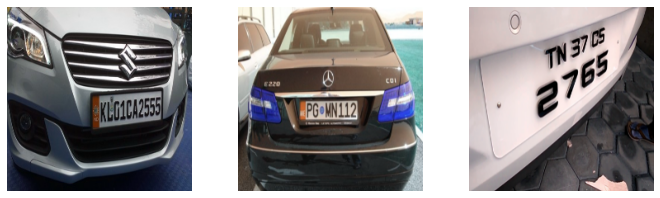

In [23]:
plt.figure(figsize=(20,40))
for i in range(0,3) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i])

In [10]:
from lxml import etree

In [11]:
data_xml_files = ['car-plate-detection/annotations/'+ i for i in sorted(os.listdir('car-plate-detection/annotations'))]
xml_files = []
for xml in data_xml_files:
    key_tree = etree.parse(xml)
    for key in key_tree.xpath("size"):
        width = int(key.xpath("width")[0].text)
        height = int(key.xpath("height")[0].text)
    for value in key_tree.xpath("object/bndbox"):
        xmin = int(value.xpath("xmin")[0].text)/(width/224)
        ymin = int(value.xpath("ymin")[0].text)/(height/224)
        xmax = int(value.xpath("xmax")[0].text)/(width/224)
        ymax = int(value.xpath("ymax")[0].text)/(height/224)
    xml_files.append([int(xmax), int(ymax), int(xmin), int(ymin)])

In [17]:
np.array(xml_files).shape

(433, 4)